# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Udacity Starbucks Capstone Project

- Student provides a high-level overview of the project. Background information such as the problem domain, the project origin, and related data sets or input data is provided.
- The problem which needs to be solved is clearly defined. A strategy for solving the problem, including discussion of the expected solution, has been made.
- Metrics used to measure performance of a model or result are clearly defined. Metrics are justified based on the characteristics of the problem.




## Motivation
With the dataset following business question will be revealed

## Goal

## Methodology
**CRISP-DM** will be used as the methodology to answering the business questions above. 
1. Business Understanding  
To understand how well the business is working , the business questions will be defined. The question will not only be a prediction question, but also some descriptive statistic question.
2. Data Understanding  
From the business questions, the dataset will be analyzed, so that the useful data feature could selected and cleaned accordingly.
3. Prepare Data  
The raw data are mostly not clean, in this phase, we will clean the data, so it will be ready for training the prediction later. 
4. Model Data  
For prediction question, an algorithm will be used to train the prediction model. The performance metrics will be defined and justified.
5. Results  
The results will be presented in a Medium article.
6. Deploy  
In this project there will be no deployment.

----

# Install dependencies

In [1]:
!pip install -r requirements.txt

In [2]:
# load execution time measurement tools 
%load_ext autotime

time: 0 ns (started: 2021-01-31 14:36:23 +01:00)


# Loading dataset

In [150]:
import pandas as pd
import numpy as np
import math
import json
%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

time: 2.69 s (started: 2021-01-31 20:44:40 +01:00)


# Helper method

In [50]:
def print_isna_proportion(ser: pd.Series):
    """
    Printing the proportion of isna value from a panda series.

    :param ser: panda series to be calculated for the proportion
    :return: None
    """
    print(f'Amount of isna value : {ser.isna().sum()} and its proportion : {ser.isna().sum() / len(ser)}')
    
print_isna_proportion(profile['gender'])

Amount of isna value : 2175 and its proportion : 0.12794117647058822
time: 0 ns (started: 2021-01-31 15:15:40 +01:00)


# 1. Business Understanding

# 2. Data Understanding

## 2.1. Portfolio Dataset

* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

In [4]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


time: 16 ms (started: 2021-01-31 14:36:26 +01:00)


In [5]:
portfolio.shape

(10, 6)

time: 0 ns (started: 2021-01-31 14:36:26 +01:00)


In [6]:
portfolio.dtypes

reward         int64
channels      object
difficulty     int64
duration       int64
offer_type    object
id            object
dtype: object

time: 0 ns (started: 2021-01-31 14:36:26 +01:00)


### 2.1.1 `reward` feature

In [7]:
portfolio['reward'].value_counts()

5     3
0     2
2     2
10    2
3     1
Name: reward, dtype: int64

time: 0 ns (started: 2021-01-31 14:36:26 +01:00)


### 2.1.2 `channels` feature

In [8]:
portfolio['channels']

0         [email, mobile, social]
1    [web, email, mobile, social]
2            [web, email, mobile]
3            [web, email, mobile]
4                    [web, email]
5    [web, email, mobile, social]
6    [web, email, mobile, social]
7         [email, mobile, social]
8    [web, email, mobile, social]
9            [web, email, mobile]
Name: channels, dtype: object

time: 16 ms (started: 2021-01-31 14:36:26 +01:00)


### 2.1.3 `difficulty` feature

In [9]:
portfolio['difficulty'].value_counts()

10    4
0     2
5     2
20    1
7     1
Name: difficulty, dtype: int64

time: 0 ns (started: 2021-01-31 14:36:26 +01:00)


### 2.1.4 `duration` feature

In [10]:
portfolio['duration'].value_counts()

7     4
5     2
10    2
3     1
4     1
Name: duration, dtype: int64

time: 15 ms (started: 2021-01-31 14:36:26 +01:00)


### 2.1.5 `over_type` feature

In [11]:
portfolio['offer_type'].value_counts()

bogo             4
discount         4
informational    2
Name: offer_type, dtype: int64

time: 0 ns (started: 2021-01-31 14:36:26 +01:00)


### 2.1.5 `id` feature

In [12]:
portfolio['id'].nunique()

10

time: 16 ms (started: 2021-01-31 14:36:26 +01:00)


=> There are no duplicate value (by id)

### **Summary**
- has **10** entries and no duplicated `id`
- `channels` has list of a string => has a potential to be splitted into multiple column 
- `offer type` has only 3 possible value (`discount`, `bogo`, `informational`) => One Hot Encoding
- `reward`, `diffculty`, `duration` contains numerical data

## 2.2. Profile Dataset

* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

In [13]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


time: 16 ms (started: 2021-01-31 14:43:35 +01:00)


In [14]:
profile.shape

(17000, 5)

time: 0 ns (started: 2021-01-31 14:43:37 +01:00)


In [15]:
profile.dtypes

gender               object
age                   int64
id                   object
became_member_on      int64
income              float64
dtype: object

time: 0 ns (started: 2021-01-31 14:43:39 +01:00)


In [61]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB
time: 0 ns (started: 2021-01-31 15:25:42 +01:00)


=> Check gender and income for missing value

### 2.2.1 `gender` feature

* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)

In [73]:
print_isna_proportion(profile['gender'])

Amount of isna value : 2175 and its proportion : 0.12794117647058822
time: 0 ns (started: 2021-01-31 15:42:05 +01:00)


In [78]:
profile[(profile['gender'] != 'F') & (profile['gender'] != 'M') & (profile['gender'].notna())]

,gender,age,id,became_member_on,income
31,O,53,d1ede868e29245ea91818a903fec04c6,20170916,52000.0
273,O,60,d0be9ff460964c3398a33ad9b2829f3a,20180216,94000.0
383,O,49,0d0a9ca9281248a8a35806c9ae68f872,20171207,42000.0
513,O,63,01f46a5191424005af436cdf48a5da7c,20150920,89000.0
576,O,73,644ac06dc9b34a5bbd237a465cf47571,20180316,88000.0
...,...,...,...,...,...
16670,O,76,e8926849bbe24ce488d4f3fcd3b537e8,20180320,52000.0
16683,O,49,1f68e9b6850f49348235a281a47d9f15,20170607,56000.0
16731,O,51,a97208c5be42445d9949e82e0f70f622,20160707,55000.0
16741,O,56,994b6ef7a8ca46e3b379518399f6ec93,20180221,52000.0


time: 15 ms (started: 2021-01-31 15:42:44 +01:00)


=> in `gender` feature, there are 212 data containing **O**

### 2.2.2 `age` feature

=> From the `.head()` above, age 118 looks like strange number for a customer ageprofile['age'].hist()

<AxesSubplot:>

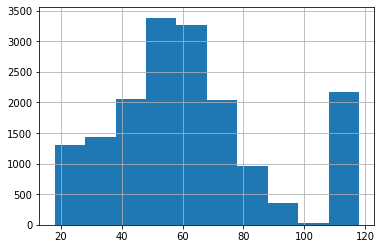

time: 157 ms (started: 2021-01-31 14:47:35 +01:00)


In [17]:
profile['age'].hist()

age > 100 will be an outlier => we will remove it

### 2.2.3 `id` feature

In [22]:
# count unique id
profile['id'].nunique()

17000

time: 0 ns (started: 2021-01-31 14:55:11 +01:00)


=> there are no dupplicate id

### 2.2.4 `became_member_on` feature

In [29]:
profile['became_member_on'].dtype

dtype('int64')

time: 0 ns (started: 2021-01-31 14:59:05 +01:00)


=> the `became_member_on` is a int-value. It need to be converted to a *datetime*

### 2.2.5 `income` feature

In [63]:
profile['income'].dtype

dtype('float64')

time: 0 ns (started: 2021-01-31 15:38:28 +01:00)


In [64]:
print_isna_proportion(profile['income'])

Amount of isna value : 2175 and its proportion : 0.12794117647058822
time: 0 ns (started: 2021-01-31 15:38:30 +01:00)


### Profile `income` outliers

In [15]:
older_than_100 = profile[profile['age']>100]
older_than_100.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN


time: 16 ms (started: 2021-01-28 23:30:55 +01:00)


In [16]:
older_than_100.shape[0]

2180

time: 0 ns (started: 2021-01-28 23:30:55 +01:00)


In [17]:
older_than_100[pd.notnull(older_than_100["income"])]

,gender,age,id,became_member_on,income
1556,F,101,4d2ccfcbbebf4bd9baf4b7e433d0e288,20171004,43000.0
4100,F,101,d2fdc2be8ab64e4ba04830d441e53fd5,20150526,99000.0
14846,F,101,e0ea90ddd2f147e082d21e97f51ec1b1,20171109,56000.0
15800,F,101,047ad0135cfe4c0ea5ba019da4de9c52,20170309,59000.0
16864,F,101,1593d617fac246ef8e50dbb0ffd77f5f,20171127,82000.0


time: 15 ms (started: 2021-01-28 23:30:55 +01:00)


### Summary
- There are **17000** entries, but with **2180** entries with `age` higher than 100 years old. => `age` need to be cleaned
- `gender`,  `income` has null values => need to be cleaned
- `became_member_on` has only string value => convert to DateTime/Timestamp

## 2.3 Transcript dataset

* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

In [26]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


time: 0 ns (started: 2021-01-29 00:02:55 +01:00)


In [19]:
transcript.shape

(306534, 4)

time: 0 ns (started: 2021-01-28 23:30:55 +01:00)


In [20]:
transcript.dtypes

person    object
event     object
value     object
time       int64
dtype: object

time: 0 ns (started: 2021-01-28 23:30:55 +01:00)


In [79]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB
time: 141 ms (started: 2021-01-31 15:48:19 +01:00)


### 2.3.1 `person` feature

In [22]:
transcript['person'].nunique()

17000

time: 78 ms (started: 2021-01-28 23:30:55 +01:00)


=> 
- the amount equals the profile amounts => each profile has at least 1 transaction
- if some profiles are dropped, the corresponding transaction need to be deleted too


### 2.3.2 `event` feature

In [21]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

time: 62 ms (started: 2021-01-28 23:30:55 +01:00)


### 2.3.3 `value` feature

In [85]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


time: 15 ms (started: 2021-01-31 17:29:04 +01:00)


In [30]:
transcript.tail()

,person,event,value,time
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714
306533,c02b10e8752c4d8e9b73f918558531f7,transaction,{'amount': 4.05},714


time: 47 ms (started: 2021-01-29 00:05:30 +01:00)


**=> it looks like that the value is dependent on the event type. => investigate further!**

In [207]:
event_types = list(transcript['event'].value_counts().index)
event_types

['transaction', 'offer received', 'offer viewed', 'offer completed']

time: 94 ms (started: 2021-01-31 21:44:58 +01:00)


In [206]:
for event_type in event_types:
    display(transcript[transcript['event'] == str(event_type)].head(5))    

,person,event,value,time
12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0
12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0


,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


,person,event,value,time
12650,389bc3fa690240e798340f5a15918d5c,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
12651,d1ede868e29245ea91818a903fec04c6,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0
12652,102e9454054946fda62242d2e176fdce,offer viewed,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
12653,02c083884c7d45b39cc68e1314fec56c,offer viewed,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},0
12655,be8a5d1981a2458d90b255ddc7e0d174,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0


,person,event,value,time
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0
12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0
12679,629fc02d56414d91bca360decdfa9288,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,0
12692,676506bad68e4161b9bbaffeb039626b,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,0
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,0


time: 250 ms (started: 2021-01-31 21:44:41 +01:00)


### 2.3.4 `time` feature

In [84]:
transcript['time'].nunique()

120

time: 16 ms (started: 2021-01-31 15:49:56 +01:00)


### Summary
- cleaning the `transcript` dataset based on deleted `profile` dataset
- `value` depends on the `event` and contains either an `offer id` or `amount` depending on the record
- `value` feature contains dictionary => convert `value` to new colum(s)

### Cleaning transcript `value`

In [42]:
transcript['value'].dtypes

dtype('O')

In [57]:
def has_multiple_key(x):
    if len(x.keys()) > 1: 
        return x

In [59]:
transcript['value'].apply(lambda x: has_multiple_key(x))

0                                                      None
1                                                      None
2                                                      None
3                                                      None
4                                                      None
5                                                      None
6                                                      None
7                                                      None
8                                                      None
9                                                      None
10                                                     None
11                                                     None
12                                                     None
13                                                     None
14                                                     None
15                                                     None
16                                      

# 2. Data cleaning & Data preparation

In this section, following dataset will be cleaned:

1. `Portfolio` dataset
    - splitting `channels` feature into multiple column 
    - one-hot-encoding of the `offer type`
  
2. `Profile` dataset
    - drop `age` which > 100 years old
    - drop `gender` and `income` feature that has null values
    - convert `became_member_on` to DateTime
    
3. `Transcript` dataset
    - convert `value` to new colum(s)
    - dropping `transcript` row based on deleted `profile` dataset

    
This will be done in 2 phases. 

- The first phases is to converting and cleaning the column and after that `profile` and `transcripts` will be joined. 
- The second phases will be more concentrated on converting the categorical data with **one-hot-encoding**.

## 2.1 Prepare `porfolio` dataset

In [151]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


time: 16 ms (started: 2021-01-31 20:44:43 +01:00)


### 2.1.1 splitting channels feature into multiple column

In [152]:
# list of all possible channel
all_channels = set()

# iterate each element of a list and append it to a set
def get_all_channels(x: list):
    for el in x:
        all_channels.add(el)
        
portfolio['channels'].apply(get_all_channels)

all_channels = list(all_channels)
all_channels

['email', 'social', 'web', 'mobile']

time: 0 ns (started: 2021-01-31 20:44:44 +01:00)


In [161]:
contains_channel = []
for portfolio_channels in portfolio['channels']:
    # iterate for each possible channel and append 1 if 
    # the channel inside the list of string from the `channels`
    # column otherwise append 0
    temp_list = [] # a container for each row of the `channel` column
    for channel in all_channels:
        temp_list.append( 1 if channel in portfolio_channels else 0)
    contains_channel.append(temp_list)

channels = pd.DataFrame(np.array(contains_channel),
                    columns=all_channels)
channels 

,email,social,web,mobile
0,1,1,0,1
1,1,1,1,1
2,1,0,1,1
3,1,0,1,1
4,1,0,1,0
5,1,1,1,1
6,1,1,1,1
7,1,1,0,1
8,1,1,1,1
9,1,0,1,1


time: 16 ms (started: 2021-01-31 20:48:51 +01:00)


In [166]:
# merged splited channels dataframe to portfolio dataframe
portfolio_cleaned = pd.concat([portfolio, channels], axis=1)
portfolio_cleaned

,reward,channels,difficulty,duration,offer_type,id,email,social,web,mobile
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,0,1
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,0,1,1
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,1,1
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,1,0
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,0,1
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,0,1,1


time: 0 ns (started: 2021-01-31 20:49:53 +01:00)


In [167]:
# dropping unused `channels` column
portfolio_cleaned.drop(columns=['channels'], inplace=True)
portfolio_cleaned

,reward,difficulty,duration,offer_type,id,email,social,web,mobile
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,0,1
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,0,1,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,1,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,1,0
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,0,1
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,0,1,1


time: 15 ms (started: 2021-01-31 20:49:54 +01:00)


## 2.2 Prepare `profile` dataset
- drop `gender` and `income` feature that has null values
- drop `age` which > 100 years old
- convert `became_member_on` to DateTime

### 2.2.1 drop `gender` and `income` feature that has null values

From previous section (2.2) summary => there are only 2 features that have NAN-value. Therefore [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) function could be executed.

In [193]:
# copy `profile` dataset and drop the NAN-value
cleaned_profile = profile.copy()
cleaned_profile = cleaned_profile.dropna()
cleaned_profile

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


time: 16 ms (started: 2021-01-31 21:34:40 +01:00)


In [184]:
cleaned_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB
time: 15 ms (started: 2021-01-31 21:24:08 +01:00)


### 2.2.2 drop `age` which > 100 years old

<AxesSubplot:>

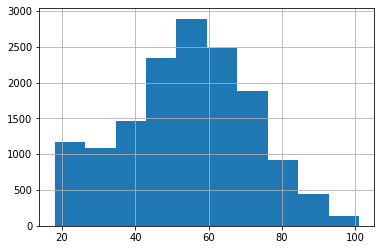

time: 109 ms (started: 2021-01-31 21:24:10 +01:00)


In [185]:
cleaned_profile['age'].hist()

=> The age > 100 years old are in the same row with the empy `gender` and `income`. This could be because of the customer does not want to specify their personal information.
The distribution of `age` feature are looks correct and therefore does not need to be cleaned any futher.

### 2.2.3 convert `became_member_on` to DateTime

In [186]:
cleaned_profile['became_member_on'].head()

1     20170715
3     20170509
5     20180426
8     20180209
12    20171111
Name: became_member_on, dtype: int64

time: 0 ns (started: 2021-01-31 21:24:11 +01:00)


In [192]:
# convert `becaome_member_on` to datetime
cleaned_profile['became_member_on'] = pd.to_datetime(cleaned_profile['became_member_on'], format='%Y%m%d')
cleaned_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   id                14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.9+ KB
time: 15 ms (started: 2021-01-31 21:34:09 +01:00)


## 2.3. Prepare `transcript` dataset

### 2.3.1 convert `value` to new colum(s)

In [196]:
transcript.head()

# create a copy of `transcript` dataframe
cleaned_transcript = transcript.copy()

time: 62 ms (started: 2021-01-31 21:35:55 +01:00)


In [243]:
value_keys = set()
def blub(x):
    value_keys.update(x.keys())

time: 0 ns (started: 2021-01-31 22:07:40 +01:00)


In [246]:
# get all possible dictionary key from the `value` column
cleaned_transcript['value'].apply(blub)
value_keys

{'amount', 'offer id', 'offer_id', 'reward'}

time: 188 ms (started: 2021-01-31 22:08:15 +01:00)


In [248]:
# iterate each `value` and extract it in a column
val = []
for values in cleaned_transcript['value']:
    temp_list = [] # a container for each row of the `channel` column
    for value in value_keys:
        temp_list.append( 1 if value in values.keys else 0)
    val.append(temp_list)

TypeError: argument of type 'builtin_function_or_method' is not iterable

time: 0 ns (started: 2021-01-31 22:10:48 +01:00)
